In [176]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import requests
import haversine as hs
import time


load_dotenv('config.env')
map_api_key = os.getenv('GOOGLE_MAP_API_KEY')
map_api_key1 = os.getenv('GOOGLE_MAP_API_KEY1')
housing_csv = pd.read_csv('../../Downloads/NY-House-Dataset.csv')
housing_df = housing_csv.iloc[:1000,:] # don't want to get charged $$$ 
housing_df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [168]:
housing_df['location'] = housing_df.apply(lambda row: (row['LATITUDE'], row['LONGITUDE']), axis=1)


/var/folders/pp/b2jz14q17p598_1pnl_hz9240000gn/T/ipykernel_70217/1814179455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['location'] = housing_df.apply(lambda row: (row['LATITUDE'], row['LONGITUDE']), axis=1)


In [169]:
housing_df['price_per_sqft'] = housing_df.apply(lambda row: row['PRICE']/row['PROPERTYSQFT'], axis=1)
housing_df.head()

/var/folders/pp/b2jz14q17p598_1pnl_hz9240000gn/T/ipykernel_70217/361864166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['price_per_sqft'] = housing_df.apply(lambda row: row['PRICE']/row['PROPERTYSQFT'], axis=1)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,location,price_per_sqft
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,"(40.761255, -73.9744834)",225.000000
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,"(40.7663935, -73.9809909)",11114.277572
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,"(40.5418051, -74.1961086)",129.032258
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,"(40.7613979, -73.9746128)",155.056180
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,"(40.7672235, -73.9698561)",3880.070547


In [170]:
df1 = housing_df[['price_per_sqft', 'location']]; df1

,price_per_sqft,location
0,225.000000,"(40.761255, -73.9744834)"
1,11114.277572,"(40.7663935, -73.9809909)"
2,129.032258,"(40.5418051, -74.1961086)"
3,155.056180,"(40.7613979, -73.9746128)"
4,3880.070547,"(40.7672235, -73.9698561)"
...,...,...
995,475.198413,"(40.5782884, -74.1583011)"
996,1437.500000,"(40.7236159, -73.9781735)"
997,273.743017,"(40.7577991, -73.7159564)"
998,619.153675,"(40.7111134, -73.7361784)"


In [171]:
class NearByStoreSearch():
    """
    A class to search the number of nearby stores using the Google Maps API.
    
    Attributes:
        keywords (list of str): A list of the store names to search for. 
        location (list of tuple): A list of tuples, where each tuple contains two float values of the latitude and longitude of the location from which the search is run.
        radius (int): the search radius in meters within which to find the stores specified the keywords, default is set to 500m, which is considered to be a walking distance.
        key (str): Google Maps API registered to use Places API.
        
    Output:
    """
    def __init__(self, locations, radius=500, key=map_api_key):
        self.locations = locations
        self.radius = radius
        self.key = key
        self.base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"

    def num_of_stores_nearby(self, keywords):
        radius_in_kilo = self.radius / 1000 # convert meters to kilos
        result = {'location':[]}
        for k in keywords:
            result[k] = []

        for lat, lng in self.locations:
            result['location'].append((lat, lng))
            for keyword in keywords:
                more_pages = True
                next_page_token = None
                num_of_stores_nearby = 0

                while more_pages:
                    if next_page_token: 
                        params = f'keyword={keyword}&location={str(lat)}%2C{str(lng)}&radius={self.radius}&key={self.key}&pagetoken={next_page_token}'
                    else:
                        params = f'keyword={keyword}&location={str(lat)}%2C{str(lng)}&radius={self.radius}&key={self.key}'
                    
                    time.sleep(2)
                    response = requests.get(self.base_url + params)
                    if response.status_code == 200:
                        data = response.json()
                        results = data.get('results')
                        next_page_token = data.get('next_page_token')
                        results_locs = [(res['geometry']['location']['lat'], res['geometry']['location']['lng']) for res in results]
                        distance_to_results = [hs.haversine((lat, lng), loc) for loc in results_locs]
                        num_of_stores_nearby += sum([1 for d in distance_to_results if d < radius_in_kilo])

                        more_pages = bool(next_page_token)
                    else:
                        print(f'Failed to fetch results for {keyword} at {(lat, lng)}')
                        break
                result[keyword].append(num_of_stores_nearby)
                # print(f'There are {num_of_stores_nearby} {keyword} within {self.radius}M from {(lat, lng)}')

        return result

    def num_of_good_restaurants(self, rating_above=4):
        """
        number of restaurants with price level of 3 and 4 and 5, with having the rating above `rating_above`
        """
        # TODO: Should I consider vicinity of those restaurants?
        num_res = {'location': []}
        num_res['num_res_price_lv_3'] = []
        num_res['num_res_price_lv_4'] = []

        for lat, lng in self.locations:
            time.sleep(1)
            num_res['location'].append((lat, lng))
            param = f'keyword=restaurants&location={str(lat)}%2C{str(lng)}&radius={self.radius}&key={self.key}'
            response = requests.get(self.base_url+param)
            results = response.json().get('results',[])

            if not results:
                print(f'No restaurants results found for the given location {(lat, lng)}.')
                num_res['num_res_price_lv_3'].append(0) # expensive
                num_res['num_res_price_lv_4'].append(0) # very expensive
                continue

            lv_3 = 0
            lv_4 = 0
            lv_5 = 0

        
            for result in results:
                rating = result.get('rating', None)
                price_level = result.get('price_level', None)

                if rating is not None and price_level is not None:
                    if rating >= rating_above:
                        if price_level == 3:
                            lv_3 += 1
                        elif price_level == 4:
                            lv_4 += 1
                        elif price_level == 5:
                            lv_5 += 1
                        else:
                            continue

            num_res['num_res_price_lv_3'].append(lv_3) # expensive
            num_res['num_res_price_lv_4'].append(lv_4) # very expensive 

        return num_res
                



In [172]:
locations = list(zip(housing_df['LATITUDE'], housing_df['LONGITUDE']))
nearby_stores = NearByStoreSearch(locations)

In [173]:
df2 = nearby_stores.num_of_good_restaurants()
df2 = pd.DataFrame(df2); df2

No restaurants results found for the given location (40.5418051, -74.1961086).
No restaurants results found for the given location (40.6499031, -73.7354706).
No restaurants results found for the given location (40.5143019, -74.2044734).
No restaurants results found for the given location (40.5273093, -74.1753435).
No restaurants results found for the given location (40.7464683, -73.9872992).
No restaurants results found for the given location (40.5409077, -74.1964937).
No restaurants results found for the given location (40.5132339, -74.1959753).
No restaurants results found for the given location (40.5704687, -73.8558742).
No restaurants results found for the given location (40.5501403, -74.1810379).
No restaurants results found for the given location (40.5395581, -74.2229079).
No restaurants results found for the given location (40.5663057, -74.1529549).
No restaurants results found for the given location (40.7773521, -73.7464296).
No restaurants results found for the given location 

,location,num_res_price_lv_3,num_res_price_lv_4
0,"(40.761255, -73.9744834)",8,0
1,"(40.7663935, -73.9809909)",5,0
2,"(40.5418051, -74.1961086)",0,0
3,"(40.7613979, -73.9746128)",8,0
4,"(40.7672235, -73.9698561)",6,1
...,...,...,...
995,"(40.5782884, -74.1583011)",0,0
996,"(40.7236159, -73.9781735)",1,0
997,"(40.7577991, -73.7159564)",0,0
998,"(40.7111134, -73.7361784)",0,1


In [178]:
df2.to_csv('num_of_restaraunts_nearby.csv')

In [177]:
keywords = ['Starbucks', 'Whole Foods', 'Movie Theater', 'Equinox']
locations = list(zip(housing_df['LATITUDE'], housing_df['LONGITUDE']))
nearby_stores = NearByStoreSearch(locations, key=map_api_key1)

df3 = nearby_stores.num_of_stores_nearby(keywords)
df3 = pd.DataFrame(df3); df3

,location,Starbucks,Whole Foods,Movie Theater,Equinox
0,"(40.761255, -73.9744834)",10,0,4,2
1,"(40.7663935, -73.9809909)",8,1,2,1
2,"(40.5418051, -74.1961086)",0,0,0,0
3,"(40.7613979, -73.9746128)",10,0,4,2
4,"(40.7672235, -73.9698561)",3,0,2,2
...,...,...,...,...,...
995,"(40.5782884, -74.1583011)",0,0,0,0
996,"(40.7236159, -73.9781735)",0,0,0,0
997,"(40.7577991, -73.7159564)",0,0,1,0
998,"(40.7111134, -73.7361784)",0,0,0,0


In [179]:
df3.to_csv('num_of_stores_nearby.csv')

In [183]:
df3.shape

(1000, 5)

In [188]:
merged_df = pd.merge(df1, df2, on='location', how='inner'); merged_df.shape
merged_df = pd.merge(merged_df, df3, on='location', how='inner')
merged_df.to_csv('merged_df.csv', index=False)

In [190]:
merged_df_unique = merged_df.drop_duplicates()
merged_df_unique.head()

,price_per_sqft,location,num_res_price_lv_3,num_res_price_lv_4,Starbucks,Whole Foods,Movie Theater,Equinox
0,225.000000,"(40.761255, -73.9744834)",8,0,10,0,4,2
1,11114.277572,"(40.7663935, -73.9809909)",5,0,8,1,2,1
2,129.032258,"(40.5418051, -74.1961086)",0,0,0,0,0,0
3,155.056180,"(40.7613979, -73.9746128)",8,0,10,0,4,2
9,155.056180,"(40.7613979, -73.9746128)",7,0,10,0,4,2


In [148]:
!pip install scikit-learn

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [192]:
X = merged_df.drop(['price_per_sqft', 'location'], axis=1)
y = merged_df['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Text(0, 0.5, 'RMSE')

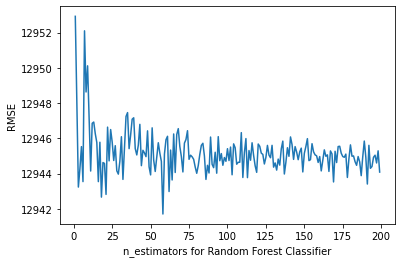

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline


scores = []
for k in range(1,200):
    rfc = RandomForestRegressor(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)

plt.plot(range(1,200), scores)
plt.xlabel('n_estimators for Random Forest Classifier')
plt.ylabel('RMSE')
    


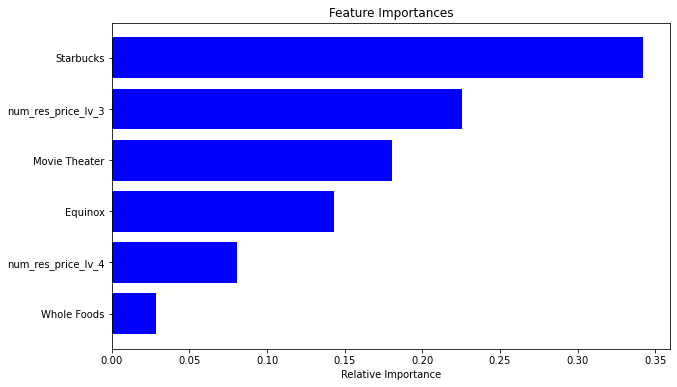

In [196]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Starbucks has the most feature importance followed by the number of restaurants that has price level of 3, movie theator, equinox, the number of restaurants with the price level of 4, and Whole Foods